Реализуем градиентный спуск для задачи поиска оптимальных коэффициентов в MSE регрессии!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Имеем 1000 объектов и 10 признаков у каждого (+таргет)!

Обучим модель линейной регрессии:

$$
a(x) = \beta_1 d_{1} + \beta_2 d_{2} + \beta_3 d_{3} + \beta_4 d_{4} + \beta_5 d_{5} + \beta_6 d_{6} + \beta_7 d_{7} + \beta_8 d_{8} + \beta_9 d_{9} + \beta_{10} d_{10} + \beta_0
$$

Которая минимизирует MSE:

$$
Q(a(X), Y) = \sum_i^{1000} (a(x_i) - y_i)^2
$$

In [2]:
data = pd.read_csv('data.csv')

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751


In [8]:
tmp = data.copy()
tmp.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751


In [12]:
tmp.dot(np.full([10,1], 10))

ValueError: Dot product shape mismatch, (1000, 12) vs (10, 1)

In [17]:
xxx = tmp.iloc[:, 0:10]

In [24]:
xxx * np.array([1,2,3,4,5,6,7,8,9,10])

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.113768,1.860129,0.991583,0.043948,1.328516,4.196772,0.409255,3.453146,5.858618,7.518202
1,0.380048,0.971892,2.610697,1.893602,2.272579,3.005183,3.302060,1.874633,0.656834,0.083717
2,0.768462,0.435413,2.182315,2.873507,2.260776,2.607830,0.307920,7.779908,4.051196,3.781571
3,0.606637,1.208669,1.620996,1.964944,1.628158,1.238089,5.780369,2.659801,8.599658,1.628110
4,0.119770,0.939436,1.898486,2.016830,1.191294,2.714741,5.427523,1.394092,1.058591,2.188831
...,...,...,...,...,...,...,...,...,...,...
995,0.538751,0.145736,1.012201,2.124057,1.200640,3.914821,5.409439,0.498910,7.746895,5.945962
996,0.898252,0.338435,2.250476,0.622907,4.220398,2.418541,0.691726,2.886765,5.519547,3.237097
997,0.813122,0.503010,0.853368,1.256372,4.348487,5.974043,6.798496,2.597021,5.261593,0.202213
998,0.722563,1.066926,2.242337,3.892208,2.314577,5.759387,3.931120,0.476845,5.399043,4.076101


Обучим коэффициенты линейной регрессии с помощью библиотеки <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> **sklearn** </a>

Отдельно выведем оценку свободного коэффициента  ($\beta_0$ при $d_0 = 1$)

In [3]:
from sklearn.linear_model import LinearRegression

X = data.drop(columns=['target'])
Y = data.target

model = LinearRegression()
model.fit(X,Y)

### Your code is here

LinearRegression()

In [4]:
for column, coef in zip(X.columns, model.coef_):
    print(column, coef)

print('intercept: ', model.intercept_)

feature_1 1.000000000000004
feature_2 1.9999999999999982
feature_3 2.999999999999998
feature_4 3.9999999999999987
feature_5 4.999999999999996
feature_6 6.000000000000008
feature_7 7.000000000000001
feature_8 8.000000000000005
feature_9 9.000000000000002
feature_10 10.000000000000002
intercept:  4.373157038707113


Теперь вам необходимо реализовать класс для оптимизации коэффициентов линейной регрессии МНК.
Подразумевается, что на вход алгоритм будет принимать следующие параметры:

- 2 pandas датафрейма **samples** и **targets**, содержащих матрицу объектов и ветор ответов соответственно
- значение **learning rate**, который корректирует длину вектора-градиента (чтобы он не взорвался)
- значение **threshold**'а для критерия останова (когда мы считаем, что мы сошлись к оптимуму)
- параметр **copy**, который позволяет либо делать изменения in-place в датафрейме, подающимся в класс, если изменения матрицы объектов в принципе при обучении имеются. Или же копировать объект при инициализации класса и возвращать новый объект, если требуется.

Он будет состоять из следующих важных компонент-методов:

- **add_constant_feature**: добавляет колонку с названием *constant* из единичек к переданному датафрейму **samples**. Это позволяет оценить свободный коэффициент $\beta_0$.

- **calculate_mse_loss**: вычисляет при текущих весах **self.beta** значение среднеквадратической ошибки.

- **calculate_gradient**: вычисляет при текущих весах вектор-градиент по функционалу.

- **iteration**: производит итерацию градиентного спуска, то есть обновляет веса модели, в соответствии с установленным **learning_rate = $\eta$**: $\beta^{(n+1)} = \beta^{(n)} - \eta \cdot \nabla Q(\beta^{(n)})$

- **learn**: производит итерации обучения до того момента, пока не сработает критерий останова обучения. В этот раз критерием останова будет следующее событие: во время крайней итерации изменение в функционале качества модели составило значение меньшее, чем **self.threshold**. Иными словами, $|Q(\beta^{(n)}) - Q(\beta^{(n+1)})| < threshold$.

P.S. установите в **__init__** аттрибут экземпляра с названием **iteration_loss_dict**, который будет устроен следующим образом: на каждой итерации мы будем добавлять в словарь пару ключ-значение, где ключем будет номер итерации $n$, а значением - среднеквадратическая ошибка в точке $\beta^{(n)}$. Это пригодится нам в будущем для визуализации.

### Hint: пример вычисления производной

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + ... + \beta_n \cdot d_{in} - y_i)^2
$$

Выше - минимизируемая функция. Она зависит от n переменных: $\beta_1, ..., \beta_n$. Вектор-градиент - матрица с одной строчкой, состоящей из производных 1го порядка по всем переменным.

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; ... \;\;\; Q'_{\beta_{n-1}}  \;\;\;  Q'_{\beta_n})
$$

Пример вычисления производной по первой переменной:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

Скажем, для нашего датасета X, Y вычислим эту саму производную при начальных единичных коэффициентах $\beta_{start} = (1 \;\;\; 1 \;\;\; ...)$

Получим для каждого объекта в начале выражение из скобочек: 
$$
\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i
$$

In [5]:
### Инициализируем точку для коэффициентов в виде вектора из единичек
initial_betas = np.ones(X.shape[1])

### Получим выражение выше для каждого объекта. 
### Для этого скалярно перемножим строчки из X на наши beta

scalar_value = np.dot(X, initial_betas.reshape(-1, 1)).ravel()
scalar_value = (scalar_value - Y).values

Теперь полученное значение для каждого объекта умножим на соответствующее значение признака $d_1$:

$$
d_{i1} \cdot (\beta_1 \cdot d_{i1} + ... + \beta_{n} \cdot d_{in} - y_i)
$$

In [6]:
### Возьмем столбик со значениями 1 признака

d_i1 = X.values[:, 0]

### Умножим каждый объект на соответствующее значение признака
scalar_value = scalar_value * d_i1

In [7]:
### Наконец, умножим все на 2 и усреднимся, 
### чтобы получить значение производной по первому параметру

2 * np.mean(scalar_value)

np.float64(-27.62384887912409)

### Эта логика поможем Вам при реализации класса!

learn(self)

метод возвращает итоговую среднеквадратическую ошибку.
метод итеративно вычисляет среднеквадратическую ошибку и вектор-градиент. номер итерации и MSE записываются в словарь *iteration_loss_dict*. критерий останова срабатывает тогда, когда абсолютное значение разницы двух последних MSE меньше *self.threshold*.

In [28]:
class GradientDescentMse:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        self.samples - матрица признаков
        self.targets - вектор таргетов
        self.beta - вектор из изначальными весами модели == коэффициентами бета (состоит из единиц)
        self.learning_rate - параметр *learning_rate* для корректировки нормы градиента
        self.threshold - величина, меньше которой изменение в loss-функции означает остановку градиентного спуска
        iteration_loss_dict - словарь, который будет хранить номер итерации и соответствующую MSE
        copy: копирование матрицы признаков или создание изменения in-place
        """
        if copy:
            self.samples = samples.copy(deep=True)
            self.targets = targets.copy(deep=True)
        else:
            self.samples = samples
            self.targets = targets

        self.learning_rate = learning_rate
        self.threshold = threshold

        self.iteration_loss_dict = dict()
        self.beta = np.ones(samples.shape[1])


    def add_constant_feature(self):
        """
        Метод для создания константной фичи в матрице объектов samples
        Метод создает колонку с константным признаком (interсept) в матрице признаков.
        Hint: так как количество признаков увеличилось на одну, не забудьте дополнить вектор с изначальными весами модели!
        """
        self.samples['constant'] = 1
        self.beta = np.ones(self.samples.shape[1])
        
    def calculate_mse_loss(self) -> float:
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели : float
        """
        x_cof = self.samples.dot(self.beta)
        result = np.mean(np.square(x_cof - self.targets))

        return result

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        Метод возвращает вектор-градиент, содержащий производные по каждому признаку.
        Сначала матрица признаков скалярно перемножается на вектор self.beta, и из каждой колонки
        полученной матрицы вычитается вектор таргетов. Затем полученная матрица скалярно умножается на матрицу признаков.
        Наконец, итоговая матрица умножается на 2 и усредняется по каждому признаку.
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной : np.ndarray
        """
        predictions = self.samples.dot(self.beta)
        errors = predictions - self.targets
        gradient = (2 / len(self.targets)) * self.samples.T.dot(errors)
        return gradient

    
    
    def iteration(self):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        ### Your code is here
        self.beta = self.beta - self.learning_rate * self.calculate_gradient()
        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        Запись mse и номера итерации в iteration_loss_dict
        
        Описание алгоритма работы для изменения бет:
            Фиксируем текущие beta -> start_betas
            Делаем шаг градиентного спуска
            Записываем новые beta -> new_betas
            Пока |L(new_beta) - L(start_beta)| > threshold:
                Повторяем первые 3 шага
                
        Описание алгоритма работы для изменения функции потерь:
            Фиксируем текущие mse -> previous_mse
            Делаем шаг градиентного спуска
            Записываем новые mse -> next_mse
            Пока |(previous_mse) - (next_mse)| > threshold:
                Повторяем первые 3 шага
        """
        n_features = self.samples.shape[1]
        self.beta = np.zeros(n_features)  # Инициализация весов нулями
        previous_loss = float('inf')
        iteration = 0

        while True:  # Максимальное количество итераций
            loss = self.calculate_mse_loss()
            self.iteration_loss_dict[iteration] = loss

            # Проверка критерия остановки
            if abs(previous_loss - loss) < self.threshold:
                print(f"Остановка на итерации {iteration} с MSE: {loss}")
                break

            self.iteration()
            previous_loss = loss
            iteration += 1

Обучим коэффициенты линейной модели с помощью реализованного нами градиентного спуска, не забыв добавить свободную переменную. Получились ли такие же коэффициенты, как и при использовании **LinearRegression** из **sklearn**? Если нет, то почему они отличаются, на Ваш взгляд, и сильно ли?

In [29]:
X = data.drop(columns=['target'])
Y = data.target

GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

Остановка на итерации 45223 с MSE: 0.010742490042108744


In [30]:
print('Веса модели при переменных d1, d2, ..., d10 равны соответственно: \n\n' + str(GD.beta))

Веса модели при переменных d1, d2, ..., d10 равны соответственно: 

feature_1     0.884633
feature_2     1.900685
feature_3     2.879306
feature_4     3.875931
feature_5     4.896009
feature_6     5.891861
feature_7     6.893627
feature_8     7.904403
feature_9     8.876808
feature_10    9.861756
constant      4.948869
dtype: float64


Попробуйте теперь изменить значения **learning_rate** и/или **threshold**. Например, установите длину шага $\eta = 1$. Что произошло и почему такое возможно?

In [ ]:
### Your code is here

В машинном обучении зачастую исследуют так называемые **траектории обучения** (или **learning paths**). Это графики, показывающие, как во время обучения при каждой следующей итерации изменялось значение минимизируемого функционала. Постройте такие траектории для различных **learning rate**'ов и **threshold**'ов. Советуем использовать для этого разобранный на занятиях **add_subplot** метод. 

Возьмите следующие **threshold**'ы: 1e-2, 1e-3, 1e-4, 1e-5

И следующие значения **learning rate**'а: 1e-1, 5e-2, 1e-2, 5e-3, 1e-3

У вас должен получиться примерно такой график (см. ниже, значения среднеквадратической ошибки мы намеренно замазали оранжевыми квадратиками, чтобы не спойлерить вам результаты).

Как и подобает хорошим Data Scientist'ам, не забывайте подписывать графики, оси, а так же делать элементы ваших визуализаций читаемыми и видимыми. Советуем пересмотреть методы и параметры форматирования из лекции.

При какой комбинации **threshold** - **learning rate** из возможных предложенных выше, получается достигнуть меньшего значения нашей минимизируемой функции? Запишите каждой из значений в легенде на графиках.


Остановка на итерации 102 с MSE: 0.48402971234450254
Остановка на итерации 220 с MSE: 0.09646357328113914
Остановка на итерации 452 с MSE: 0.010661245715448521
Остановка на итерации 699 с MSE: 0.001065273971520052


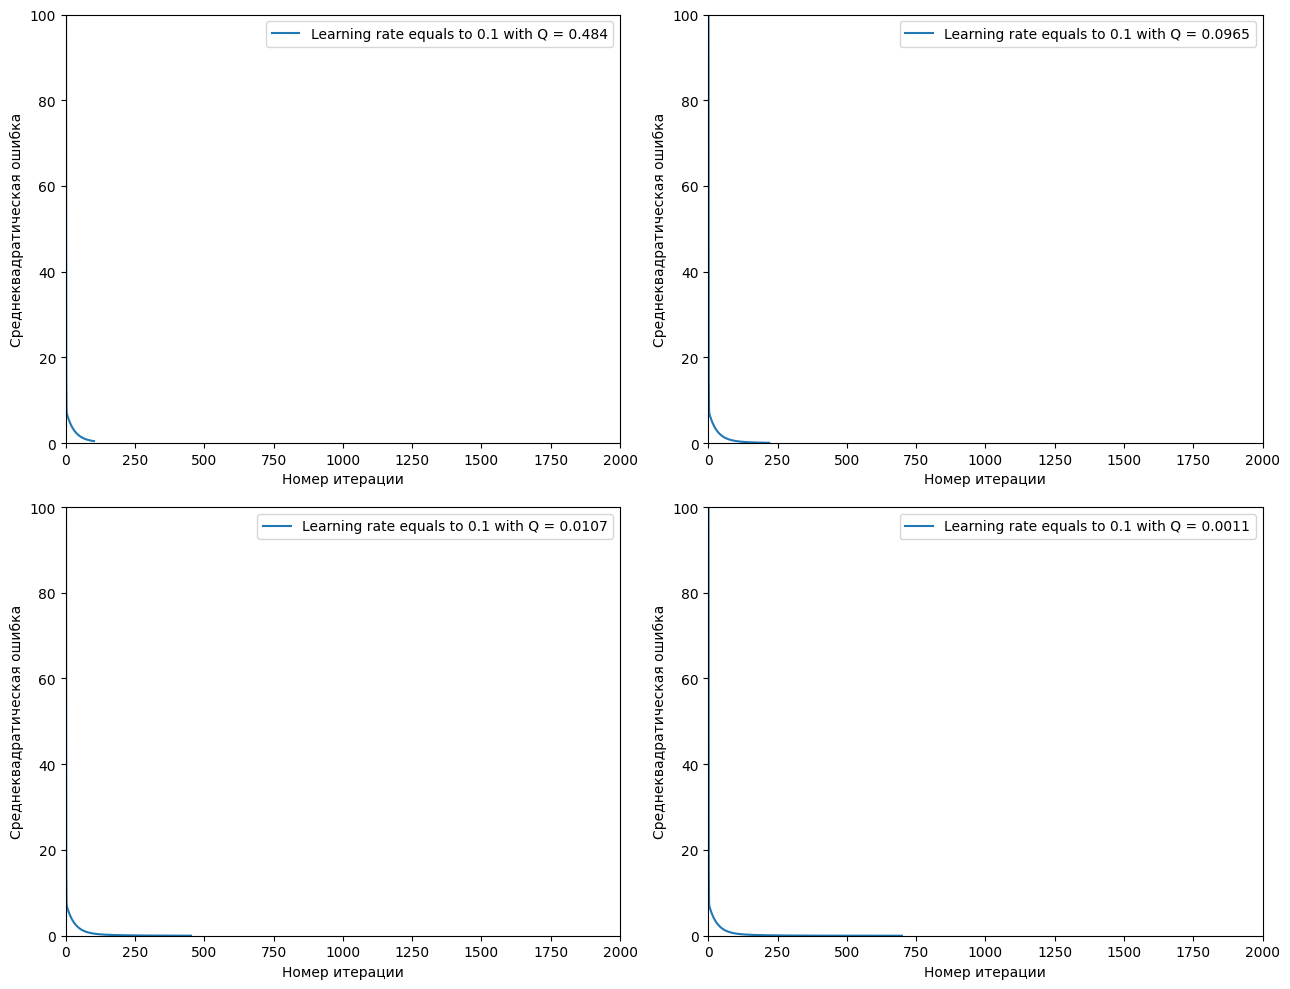

In [37]:

fig = plt.figure()
X = data.drop(columns=['target'])
Y = data.target


fig.set_size_inches(13, 10)

"""Задать списки для итераций"""
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
thresholds = [0.01, 0.001, 0.0001, 0.00001]

learning_rates = learning_rates[:1]

for i in range(len(thresholds)):
    """Задать threshold, добавить график на полонто, создать список для хранения значений функционала"""
    ### Your code is here
    ax_ = fig.add_subplot(2, 2, i+1)
    Q_values = []

    for lr in learning_rates:
        """Создать объект модели, добавить константу, запустить обучение модели"""
        ### Your code is here

        GD = GradientDescentMse(samples=X, targets=Y, learning_rate=lr, threshold=thresholds[i])
        GD.add_constant_feature()
        GD.learn()
        
        """Определить learning_path через атрибут iteration_loss_dict"""
        ### Your code is here
        learning_path = GD.iteration_loss_dict
        
        """Отобразить learning_path на графике"""
        plt.plot(learning_path.keys(), learning_path.values())

        plt.ylim(0, 100)
        plt.xlim(0, 2000)
        
        Q_values.append(str(round(list(learning_path.values())[-1], ndigits=4)))
    
    plt.ylabel('Среднеквадратическая ошибка')
    plt.xlabel('Номер итерации')
    plt.legend([f'Learning rate equals to {learning_rates[i]}' + ' with Q = ' + Q_values[i] for i in range(len(learning_rates))])

fig.tight_layout() 

plt.show()